* __Problem Statement__: The time within the food get delivered is a very important factor for a food delivery platform. This time taken is also responsible for popularity of a food delivery platform. If the delivery time of food is high then this could be a big issue for these platform, this could also led to loss of customers.
* __Aim__: Aim is to based on physical factors(location, weather, vehicle, traffic...) of the surroundings predict the time in which the food gets delivered.

In [1]:
# loading libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the csv file to pandas DataFrame
data = pd.read_csv('data/finalTrain.csv')
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


This data is from some food delivery platform which has features like age of delivery person, locations, traffic, weather conditions, vehicle condition, vehicle type, city ...

In [3]:
# Checking the shape of data
data.shape

(45584, 20)

In [4]:
# more information about shape and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

So we have 19 features and 45584 rows

### Handling Missing values

In [5]:
# columns with missing values
missing_count = data.isna().sum()
missing_count[missing_count > 0]

Delivery_person_Age        1854
Delivery_person_Ratings    1908
Time_Orderd                1731
Weather_conditions          616
Road_traffic_density        601
multiple_deliveries         993
Festival                    228
City                       1200
dtype: int64

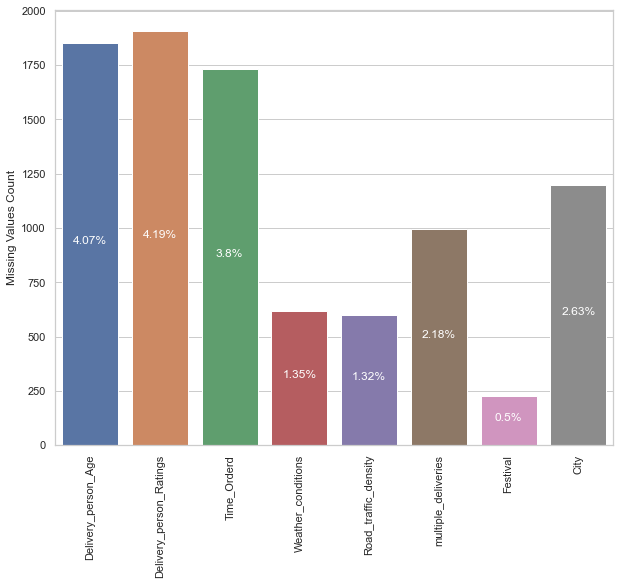

In [6]:
# selecting only columns with missing values more than 0
missing = missing_count[missing_count > 0]
# percentage of missing values
missing_prcnt = (missing/data.shape[0]) * 100
sns.set(rc = {'figure.figsize': (10, 8)})
sns.set_style(style = 'whitegrid')
ax = sns.barplot(x = missing.index, y = missing.values)
plt.ylabel('Missing Values Count')

# labeling the all bar with missing number of percentage
for i in range(missing.shape[0]):
    x, y = i, missing[i]/2
    s = str(round(missing_prcnt[i], 2)) + '%'
    ax.text(x, y, s, color = 'white', ha = 'center')

plt.xticks(rotation = 90)
plt.show()

As we can see there are a decent number of missing values in these columns.

In [7]:
# data types of missings columns
missings_cols = data[missing.index]
missings_cols.dtypes

Delivery_person_Age        float64
Delivery_person_Ratings    float64
Time_Orderd                 object
Weather_conditions          object
Road_traffic_density        object
multiple_deliveries        float64
Festival                    object
City                        object
dtype: object

So here we have two datatypes float and object

In [8]:
data

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
45580,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36
45581,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16
45582,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26


In [9]:
data_backup = data.copy()

Here How I will replace the missings values with suitable values
* __Delivery_person_Age__ : For this column I would fill the missing values with the median age of person based on the person's ID.
* __Delivery_person_rating__ : For this column I would fill the missing values with median age of person based in its the person's ID
* __Time_Orderd__ : For this column I would median value of the difference between Time on which order is picked and the time of order.
* __Weather_conditions__ : As this is a category column, so I would fill the missing value with the most frequent value.
* __Road_traffic_density__ : As this is also a category, so I would fill the missing value with the most frequent value.
* __multiple_deliveries__ : For this column I would fill the missing value with median value.
* __Festival__ : Using most frequent value to fill the missing value.
* __City__ : Same using most frequent value to fill the missing value.

In [10]:
# replacing missing value of Age with median age by Id
median_age_by_id = data.groupby('Delivery_person_ID').Delivery_person_Age.median()
filling_missings = data[data.Delivery_person_Age.isna()].Delivery_person_ID.map(median_age_by_id)
data['Delivery_person_Age'] = data.Delivery_person_Age.fillna(value = filling_missings)

# replacing missing value of Rating with median age by Id
median_rating_by_id = data.groupby('Delivery_person_ID').Delivery_person_Ratings.median()
filling_missings = data[data.Delivery_person_Ratings.isna()].Delivery_person_ID.map(median_rating_by_id)
data['Delivery_person_Ratings'] = data.Delivery_person_Ratings.fillna(value = filling_missings)

# replacing missing value with most frequent weather
data['Weather_conditions'].fillna(
    value = data.Weather_conditions.mode()[0],
    inplace = True
)

# replacing missing value with most frequent traffic density
data['Road_traffic_density'].fillna(
    value = data.Road_traffic_density.mode()[0],
    inplace  = True
)

# replacing missing value with median value of multiple delivery
data['multiple_deliveries'].fillna(
    value = data.multiple_deliveries.median(),
    inplace = True
)

# replacing missing value with most frequent Festival
data['Festival'].fillna(
    value = data.Festival.mode()[0],
    inplace = True
)

# replacing missing value with most frequent City
data['City'].fillna(
    value = data.City.mode()[0],
    inplace = True
)

In [11]:
# replacing missing value with median time difference between Time when a custome place a order and time when the delivery person pick the order from restaurent

# As In this dataset 00:00 is written as 24:00 and on some places the time is a decimal number like (0.45333, 1) first we handle this issue

def format_24_hour(Time: str) -> object:
    '''Returns string/NaN, If input is NaN then it return NaN, else based on the conditions.\n
        23:12 -> 23:12\n
        24:00 -> 00:00\n
        10:00:00 -> 10:00\n
        0.422 -> NaN\n
        NaN -> NaN'''
    try:
        # Convert 24:00 into 00:00
        if Time[:2] == '24':
            Time = '00' + Time[2:]
        
        # Convert 10:00:00 into 10:00
        if (n:=Time.count(':')) == 2:
            Time =  Time[:-3]

        # Convert decimal into NaN
        if n == 0:
            Time =  np.NaN
        
        return Time
    
    except:
        return Time

# Appling the format_24_hour function on both Time_Orderd and Time_Order_picked columns
data['Time_Orderd'] = data.Time_Orderd.apply(format_24_hour)
data['Time_Order_picked'] = data.Time_Order_picked.apply(format_24_hour)

In [12]:
# Median Order Picking Time

# this condition will only pick time like 12:11, 23:12 ... from Time_Ordered and Time_Order_picked column
condition = (data.Time_Orderd.notna() & data.Time_Order_picked.notna())

order = data[condition]
# Converting the Time_Orderd into DateTime object
order_time = pd.to_datetime(order['Time_Orderd'])

# Converting the Time_Order_picked to DateTime object
order_picked = pd.to_datetime(order['Time_Order_picked'])

# Median difference between order picked and order time(seconds)
median_order_pick_time = (order_picked - order_time).dt.seconds.median()

print('Median Order Picking Time is', median_order_pick_time, 'seconds')

Median Order Picking Time is 600.0 seconds


In [13]:
# Selecting only those columns where Time_Ordered is NaN and Time_Order_picked is not NaN
order = data.loc[data.Time_Orderd.isna() & data.Time_Order_picked.notna()]

# Converting into DateTime object
order_picked = pd.to_datetime(order['Time_Order_picked'])

# Here subtracting Median Order Picking Time (600 seconds) from Order Picked Time
data['Time_Orderd'].fillna(
    value = (order_picked - pd.Timedelta(seconds = median_order_pick_time)).dt.strftime('%H:%M'), 
    inplace = True
    )

The above code is same as changing this

||Time_Orderd|Time_Order_picked|
|---|---|---|
|1|NaN| 10:20|
|2|NaN| 23:12|
|3|NaN| 18:55|
|4|NaN| 13:01|

Into this

||Time_Orderd|Time_Order_picked|
|---|---|---|
|1|10:20 - 600 seconds| 10:20|
|2|23:12 - 600 seconds| 23:12|
|3|18:55 - 600 seconds| 18:55|
|4|13:01 - 600 seconds| 13:01|


In [14]:
# Selecting only those columns where Time_Ordered is not NaN and Time_Order_picked is NaN
order = data.loc[data.Time_Orderd.notna() & data.Time_Order_picked.isna()]

# Converting into DateTime object
order_time = pd.to_datetime(order['Time_Orderd'])

# Here adding Median Order Picking Time (600 seconds) to  Order Time
data['Time_Order_picked'].fillna(value = (order_time + pd.Timedelta(seconds = median_order_pick_time)).dt.strftime('%H:%M'), inplace = True)

The above code is same as changing this

||Time_Orderd|Time_Order_picked|
|---|---|---|
|1| 10:20|NaN|
|2| 23:12|NaN|
|3| 18:55|NaN|
|4| 13:01|NaN|

Into this

||Time_Orderd|Time_Order_picked|
|---|---|---|
|1|10:20|10:20 + 600 seconds|
|2|23:12|23:12 + 600 seconds|
|3|18:55|18:55 + 600 seconds|
|4|13:01|13:01 + 600 seconds|

In [15]:
# Filling the Time Ordered with most frequent value
data['Time_Orderd'].fillna(value = data.Time_Orderd.mode()[0], inplace = True)

# Selecting only those columns where both Time_Ordered and Time_Order_picked are NaN
order = data.loc[data.Time_Orderd.notna() & data.Time_Order_picked.isna()]

# Converting into DateTime Object
order_time = pd.to_datetime(order['Time_Orderd'])

# Here adding Median Order Picking Time (600 seconds) to  Order Time
data['Time_Order_picked'].fillna(value = (order_time + pd.Timedelta(seconds = median_order_pick_time)).dt.strftime('%H:%M'), inplace = True)

In [16]:
data.isna().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken (min)               0
dtype: int64

So Here our data is cleaned.

## Visualization

In [17]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


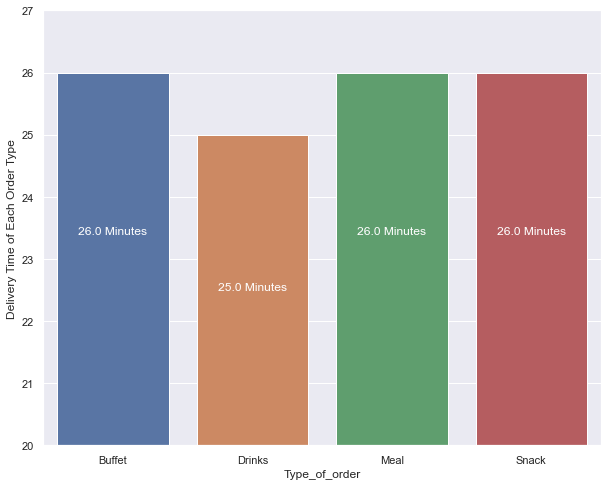

In [18]:
# What is cost of each each order type

order_type = data.groupby('Type_of_order')['Time_taken (min)'].median()

sns.set(rc = {'figure.figsize' : (10, 8)})
ax = sns.barplot(x = order_type.index, y = order_type.values)
plt.ylabel('Delivery Time of Each Order Type')

# labeling the all bar with order type percentage
for i in range(order_type.shape[0]):
    x, y = i, order_type[i] * 0.9
    s = str(order_type[i]) + ' Minutes'
    ax.text(x, y, s, color = 'white', ha = 'center')

plt.ylim(20, 27)
plt.show()

Conclusion: From this visualization we can clealy see Delivery Time is very less effect by Order type

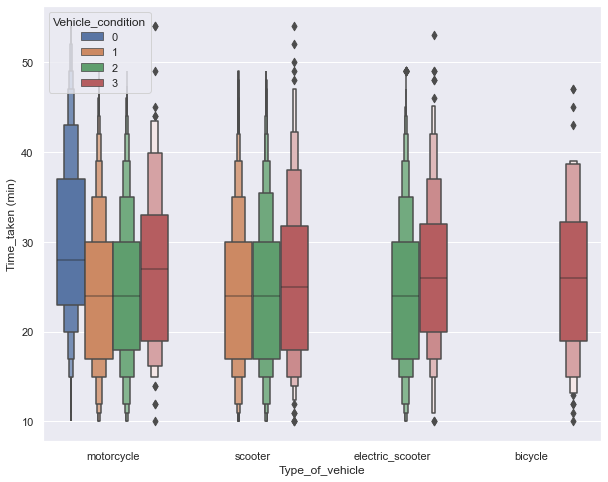

In [19]:
# Does the vehicle type and vehicle condition effect the delivery time

sns.boxenplot(
    data = data,
    x = 'Type_of_vehicle', 
    y = 'Time_taken (min)', 
    hue = 'Vehicle_condition',
    )
plt.show()

Conclusion: Here we can see that vechicle condition 2, 3 are nearly take same amount of time in delivery.

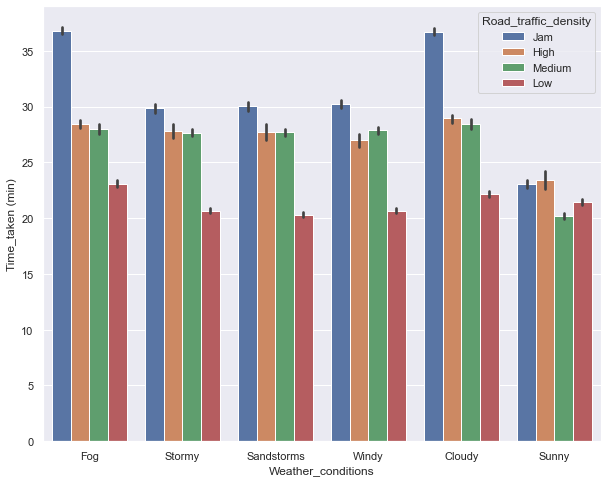

In [20]:
# Does traffic and weather condition effect the delivery time
sns.barplot(
    data = data,
    x = 'Weather_conditions', 
    y = 'Time_taken (min)', 
    hue = 'Road_traffic_density',
    )
plt.show()

Conclusion: The delivery time is very high when there is Fog and Cloudy weather with a Traffic Jam, The reason is when there is Fog then the average speed of vehicle decrease which is further decrease if there is a traffic Jam, when there is Cloudy weather then the number of vehicle on road is more than usual because weather is nice so the delivery time is increased. On the Sunny weather the temperature is high so number of vehicle on road decreases so the delivery time also decreases.

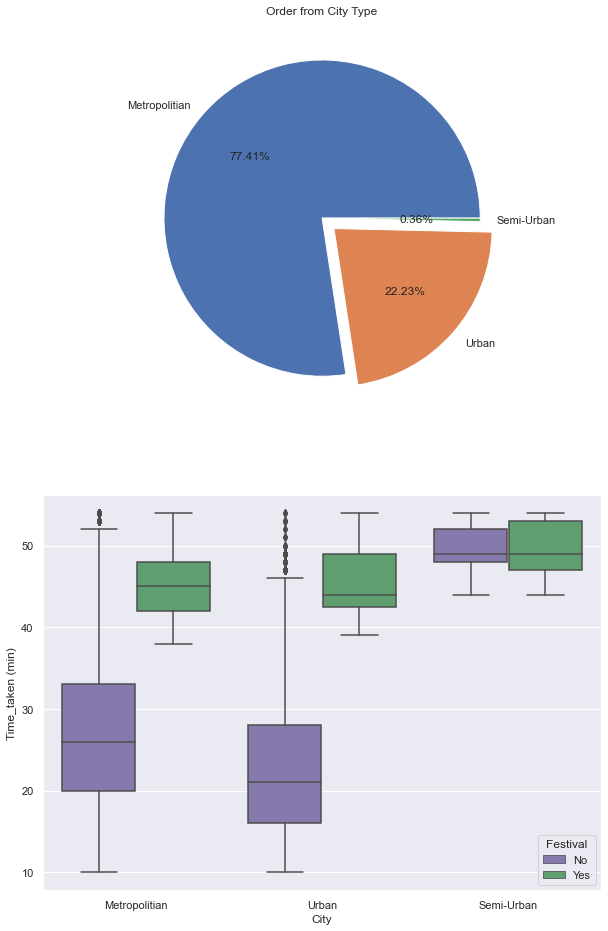

In [21]:
# Does Festival in a City effect the delivery time
order_location = data.City.value_counts()
fig, (ax_1, ax_2) = plt.subplots(2, 1, figsize = (10, 16))
ax_1.pie(x = order_location.values, labels = order_location.index, autopct = "%0.2f%%", explode = [0, 0.1, 0])
ax_1.set_title('Order from City Type')

sns.boxplot(x = "City", y = "Time_taken (min)",
            hue = "Festival", palette = ["m", "g"],
            data = data, ax = ax_2)

plt.show()

Conclusion: As there are very less orders from Semi-Urban City so the delivery time is the usually high there. While delivery time in Urban and Metropolitian City are high when there is a Festival.

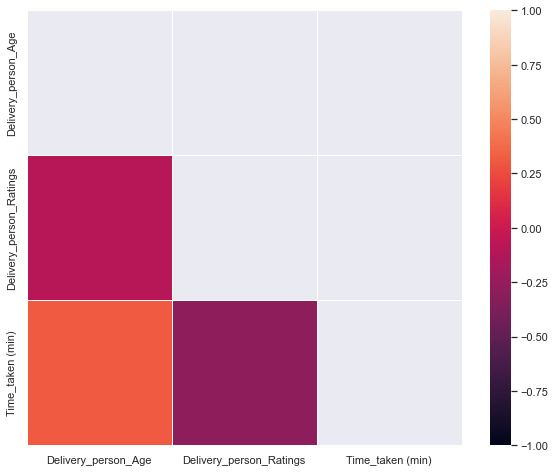

In [22]:
# Does delivery person's age and delivery person's rating effect the delivery time
x = data[['Delivery_person_Age', 'Delivery_person_Ratings', 'Time_taken (min)']]
corr = x.corr(method = 'spearman')
mask = np.triu(np.ones_like(corr, dtype = np.bool_))


sns.heatmap(corr, mask=mask, vmax = 1, vmin = -1, square=True, linewidths=.5)
plt.show()

Conclusion: So Age and Ratings are some relation with Delivery Time, So are not highly corelated.

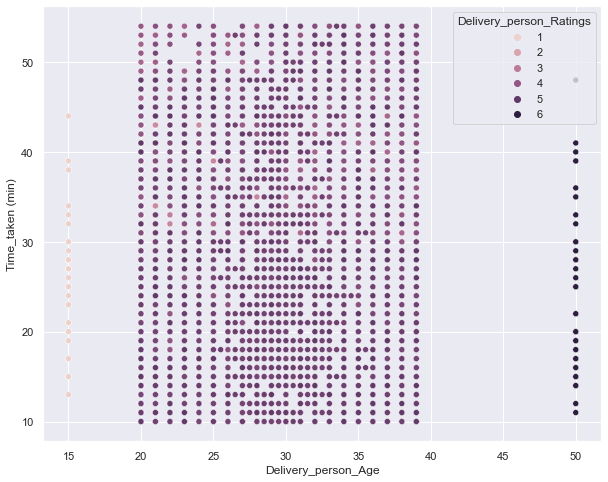

In [23]:
sns.scatterplot(
    data = data, 
    x = 'Delivery_person_Age', 
    y = 'Time_taken (min)', 
    hue = 'Delivery_person_Ratings')
plt.show()

Conclusion: Age is very less correlated

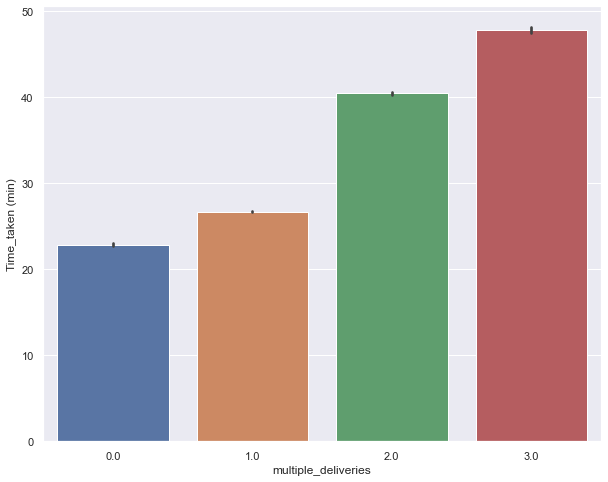

In [24]:
# Does number of order effect the delivery time
sns.barplot(
    data = data,
    x = 'multiple_deliveries', 
    y = 'Time_taken (min)', 
    )
plt.show()

Conclusion: As Here it is clear as the number of order increase the delivery time will also increases

## Converting DataTypes

In [25]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [26]:
data.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000
mean,29.566416,4.636557,17.017948,70.229684,17.465480,70.844161,1.023385,0.750197,26.293963
std,5.705988,0.328130,8.185674,22.885575,7.335562,21.120578,0.839055,0.567465,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [27]:
data = data.astype({
    'Delivery_person_Age' : np.uint8,
    'Delivery_person_Ratings' : np.float16,
    'Weather_conditions' : 'category',
    'Road_traffic_density' : 'category',
    'Vehicle_condition' : np.int8,
    'Type_of_order' : 'category',
    'Type_of_vehicle' : 'category',
    'multiple_deliveries' : np.int8,
    'Festival' : 'category',
    'City' : 'category'
})
# as there are some negitive values in coordinates as seen in above describe function
data[['Restaurant_latitude',
       'Restaurant_longitude', 
      'Delivery_location_latitude', 
      'Delivery_location_longitude']] = data[['Restaurant_latitude', 
                                              'Restaurant_longitude', 'Delivery_location_latitude', 
                                              'Delivery_location_longitude']].apply(np.abs)

# converting the columns into datetime object
data['Time_Order_picked'] = pd.to_datetime(data.Order_Date + ' ' + data.Time_Order_picked, format = '%d-%m-%Y %H:%M')
data['Time_Orderd'] = pd.to_datetime(data.Order_Date + ' ' + data.Time_Orderd, format = '%d-%m-%Y %H:%M')

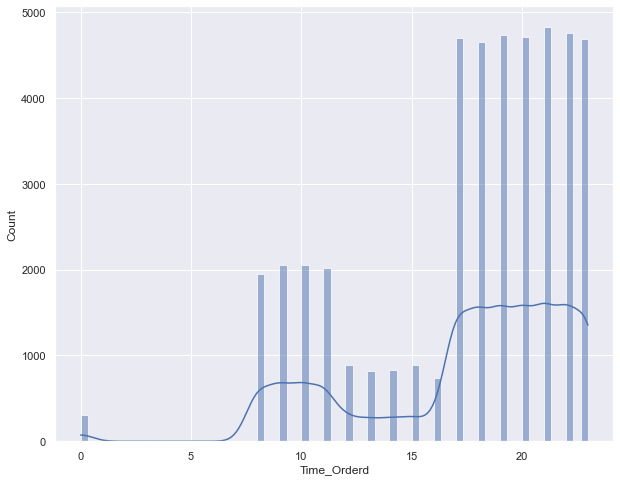

In [28]:
# On which time most of the delivery come

order_hourwise = data.Time_Orderd.dt.hour
sns.histplot(
    x = order_hourwise,
    kde = True
    
)

plt.show()


Conclusion: The most of the order are placed between 5 PM to till 12 PM and Very less order are placed between 12 AM to 7 AM (this is usually sleeping time), So people likely order food more in evening.

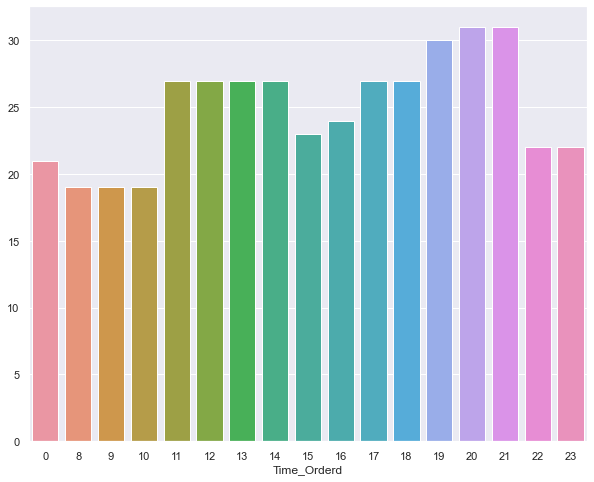

In [29]:
# On Which time the delivery is fast
delivery_daytime = data.groupby(data.Time_Orderd.dt.hour)['Time_taken (min)'].median()
sns.barplot(x = delivery_daytime.index, y = delivery_daytime.values)
plt.show()

Conclusion: The delivery in Morning is faster than delivery in evening

In [30]:
# Does the distance between Restaruant and Delivery Location effect the delivery time

# convert degree into radian
degree_radian = lambda x: x * (np.pi/180)

def globe_distance(data: pd.DataFrame, x1: str, y1: str, x2: str, y2: str) -> float:


    """Return the distance between (x1, y1) and (x2, y2), Where (x1, y1) are latitude and longitude of first location and 
    (x2, y2) are latitude and longitude of second location."""
    x1 = data[x1]
    y1 = data[y1]
    x2 = data[x2]
    y2 = data[y2]
    
    # Radius of earth (km)
    R = 6371
    lat_diff = degree_radian(x2 - x1) / 2
    lon_diff = degree_radian(y2 - y1) / 2
    d = np.square(np.sin(lat_diff)) + np.cos(degree_radian(x1)) * np.cos(degree_radian(x2)) * np.square(np.sin(lon_diff))
    D = 2 * R * np.arcsin(np.sqrt(d))
    return np.round(D, 2)

The formula used in distance calculation is $$D = (2R)sin⁻¹\left(\sqrt{sin²\left(\frac{y_{1}-x_{1}}{2}\right) + cos\left(x_{1}\right) cos\left(y_{1}\right)sin²\left(\frac{y_{2} - x_{2}}{2}\right)}\right)$$

* $R$ is radius of earth
* ($x_{1}, x_{2}$) are latitude and longitude of first location
* ($y_{1}, y_{2}$) are latitude and longitude of second location


In [31]:
data['distance_rest_deliv'] = globe_distance(
        data = data, 
        x1 = 'Restaurant_latitude', 
        y1 = 'Restaurant_longitude', 
        x2 = 'Delivery_location_latitude', 
        y2 = 'Delivery_location_longitude'
        )

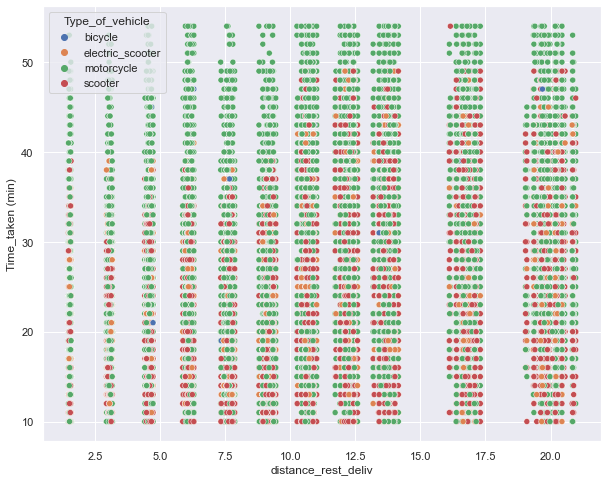

In [32]:
# Does the distance between Restaruant and Delivery Location effect the delivery time
sns.scatterplot(x = data.distance_rest_deliv, y = data['Time_taken (min)'], hue = data.Type_of_vehicle)
plt.show()

Conclusion: Delivery Time does not depend on Distance between Restaurant and Delivery location as it take same time whether distance is 2 km or 20 km, but delivery from motorcycle is fast and delivery from scooter is slow.